<a href="https://colab.research.google.com/github/bartosz-bicki/data-science-bootcamp/blob/master/Regresja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np 
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go 

In [5]:
y_true = 100 + 20 * np.random.randn(50)

In [6]:
y_pred = y_true + 10*np.random.randn(50)

In [10]:
results = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
results['error'] = results['y_true'] - results['y_pred']
results.head()

,y_true,y_pred,error
0,119.346619,95.360293,23.986327
1,98.256608,114.312044,-16.055436
2,107.618254,108.864287,-1.246033
3,62.883631,59.315708,3.567922
4,81.945643,71.463361,10.482283


In [12]:
def plot_regression_results(y_true, y_pred):
  results = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
  min = results[['y_true', 'y_pred']].min().min()
  max = results[['y_true', 'y_pred']].max().max()
  
  fig = go.Figure(data=[go.Scatter(x=results['y_true'], y=results['y_pred'], mode='markers'),
                  go.Scatter(x=[min,max], y=[min,max])],
                  layout=go.Layout(showlegend=False, width=800,
                                   xaxis_title='y_true',
                                   yaxis_title='y_pred',
                                   title='Regression'))
  fig.show()
plot_regression_results(y_true,y_pred)

In [13]:
y_true = 100 + 20*np.random.randn(1000)
y_pred = y_true + 10*np.random.randn(1000)

results = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
results['error'] = results['y_true'] - results['y_pred']

px.histogram(results, x='error', nbins=50, width=800)

In [7]:
def mean_absolute_error(y_true, y_pred):
  return abs(y_true - y_pred).sum()/ len(y_true)

mean_absolute_error(y_true, y_pred)

7.38277821445069

Regresja liniowa

In [8]:
X = np.arange(0, 50, 0.5)
noise = 10*np.random.randn(100)
y=2*X+100+noise
X=X.reshape(-1,1)
print('Rozmiar X:', X.shape)
print('Rozmiar y:',y.shape)

Rozmiar X: (100, 1)
Rozmiar y: (100,)


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.25)

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

print(lin_reg.coef_)
print(lin_reg.intercept_)


[2.04055246]
98.01083117076726


In [13]:
lin_reg.score(X_test,y_test)

0.729621772390532

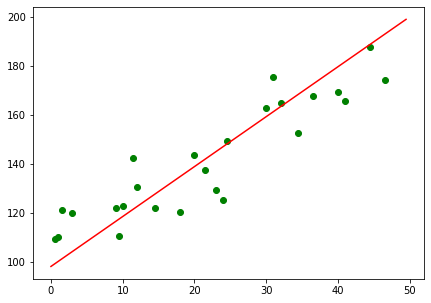

In [16]:
import matplotlib.pyplot as plt
y_pred = lin_reg.predict(X_test)
plt.figure(figsize=(7, 5))
plt.scatter(X_test, y_test, c='g', label='zbior testowy')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0]*X, c='red')


Regresja wielomianowa 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



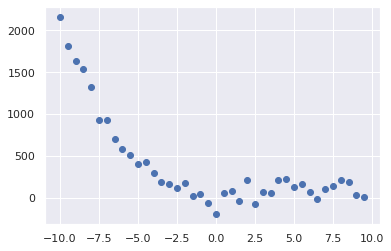

In [17]:
import seaborn as sns 
sns.set()

np.random.seed(0)
X = np.arange(-10, 10, 0.5)
noise = 80*np.random.randn(40)
y = -X**3 + 10*X**2 -2*X + 3 + noise 
X= X.reshape(40, 1)
_ = plt.scatter(X,y)

In [19]:
from sklearn.metrics import r2_score

In [21]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_poly

array([[  1.  , -10.  , 100.  ],
       [  1.  ,  -9.5 ,  90.25],
       [  1.  ,  -9.  ,  81.  ],
       [  1.  ,  -8.5 ,  72.25],
       [  1.  ,  -8.  ,  64.  ],
       [  1.  ,  -7.5 ,  56.25],
       [  1.  ,  -7.  ,  49.  ],
       [  1.  ,  -6.5 ,  42.25],
       [  1.  ,  -6.  ,  36.  ],
       [  1.  ,  -5.5 ,  30.25],
       [  1.  ,  -5.  ,  25.  ],
       [  1.  ,  -4.5 ,  20.25],
       [  1.  ,  -4.  ,  16.  ],
       [  1.  ,  -3.5 ,  12.25],
       [  1.  ,  -3.  ,   9.  ],
       [  1.  ,  -2.5 ,   6.25],
       [  1.  ,  -2.  ,   4.  ],
       [  1.  ,  -1.5 ,   2.25],
       [  1.  ,  -1.  ,   1.  ],
       [  1.  ,  -0.5 ,   0.25],
       [  1.  ,   0.  ,   0.  ],
       [  1.  ,   0.5 ,   0.25],
       [  1.  ,   1.  ,   1.  ],
       [  1.  ,   1.5 ,   2.25],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.5 ,   6.25],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   3.5 ,  12.25],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.5 ,  20.25],
       [  

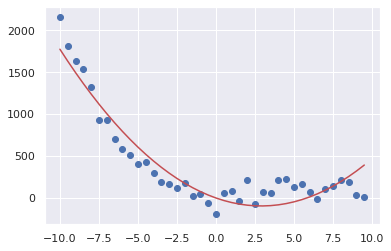

In [23]:
regressor_poly = LinearRegression()
regressor_poly.fit(X_poly, y)

y_pred = regressor_poly.predict(X_poly)

plt.scatter(X, y)
_ = plt.plot(X,y_pred, c='r')

In [25]:
np.set_printoptions(suppress=True)

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
X_poly

array([[    1.   ,   -10.   ,   100.   , -1000.   ],
       [    1.   ,    -9.5  ,    90.25 ,  -857.375],
       [    1.   ,    -9.   ,    81.   ,  -729.   ],
       [    1.   ,    -8.5  ,    72.25 ,  -614.125],
       [    1.   ,    -8.   ,    64.   ,  -512.   ],
       [    1.   ,    -7.5  ,    56.25 ,  -421.875],
       [    1.   ,    -7.   ,    49.   ,  -343.   ],
       [    1.   ,    -6.5  ,    42.25 ,  -274.625],
       [    1.   ,    -6.   ,    36.   ,  -216.   ],
       [    1.   ,    -5.5  ,    30.25 ,  -166.375],
       [    1.   ,    -5.   ,    25.   ,  -125.   ],
       [    1.   ,    -4.5  ,    20.25 ,   -91.125],
       [    1.   ,    -4.   ,    16.   ,   -64.   ],
       [    1.   ,    -3.5  ,    12.25 ,   -42.875],
       [    1.   ,    -3.   ,     9.   ,   -27.   ],
       [    1.   ,    -2.5  ,     6.25 ,   -15.625],
       [    1.   ,    -2.   ,     4.   ,    -8.   ],
       [    1.   ,    -1.5  ,     2.25 ,    -3.375],
       [    1.   ,    -1.   ,     1.   ,    -1

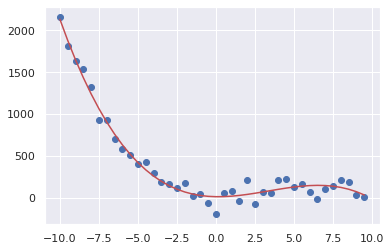

In [27]:
regressor_poly_3 = LinearRegression()
regressor_poly_3.fit(X_poly, y)

y_pred = regressor_poly_3.predict(X_poly)

plt.scatter(X, y)
_ = plt.plot(X,y_pred, c='r')

Regresja logistyczna 

In [29]:
import sklearn

In [30]:
import plotly.figure_factory as ff

Text(0.5, 1.0, 'Sigmoid Function')

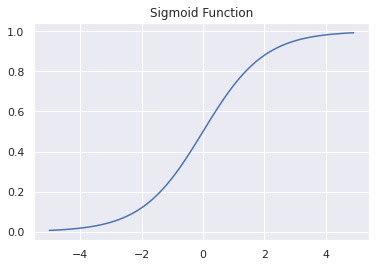

In [31]:
np.random.seed(10)
np.set_printoptions(precision=6, suppress=True)

def sigmoid(x):
  return 1 / (1+np.exp(-x))

X = np.arange(-5, 5, 0.1)
y = sigmoid(X)
plt.plot(X, y)
plt.title('Sigmoid Function')

In [32]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

In [33]:
X = data.data
y = data.target


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
from sklearn.linear_model import LogisticRegression 

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

In [42]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0])

In [44]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

def plot_confusion_matrix(cm):
  cm = cm[::-1]
  cm = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_1', 'true_0'])

  fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index),
                                    colorscale='ice', showscale=True, reversescale=True)
  fig.update_layout(width=400, height=400)
  fig.show()
plot_confusion_matrix(cm)

In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.89      0.92      0.91        52
      benign       0.96      0.93      0.94        91

    accuracy                           0.93       143
   macro avg       0.92      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143

